
#Chain-of-Thought Prompting
Chain-of-Thought (CoT) prompting enhances complex reasoning by encouraging the model to break down problems into intermediate reasoning steps. When combined with few-shot prompting, it can significantly improve performance on tasks that require multi-step reasoning before arriving at a response.

#Automatic Chain-of-Thought (Auto-CoT)
Traditionally, using CoT prompting with demonstrations involves manually crafting diverse and effective examples. This manual effort is time-consuming and can lead to less-than-optimal results. To address this, Zhang et al. (2022) introduced Auto-CoT, an automated approach that minimizes manual involvement. Their method uses the prompt “Let’s think step by step” to generate reasoning chains automatically for demonstrations. However, this automatic process is not immune to errors. To reduce the impact of such mistakes, the approach emphasizes the importance of diverse demonstrations.

#Auto-CoT operates in two main stages:

Question Clustering: Questions from the dataset are grouped into clusters based on similarity or relevance.
Demonstration Sampling: A representative question from each cluster is selected, and its reasoning chain is generated using Zero-Shot-CoT guided by simple heuristics.
#References:
[Wei et al. (2022),](https://arxiv.org/abs/2201.11903)

[OpenAI Documentation for Prompt Engineering](https://platform.openai.com/docs/guides/prompt-engineering)

In [ ]:
import json
from _pipeline import create_payload, model_req

time_new=0
# Define the use case description
USE_CASE_DESCRIPTION = """
We seek to develop a solution SQL_Guardian, aligned with the Use Case for AI-Powered SQL Learning & Interview Preparation.

Our solution aims to provide an interactive learning experience for SQL, guiding users through structured lessons, real-time query execution, and advanced interview preparation using GenAI capabilities.

The solution will work as follows:

1. **Interactive SQL Learning**: Users can ask SQL-related questions, receive detailed explanations, and see real-world examples.
2. **Real-time Query Execution**: The bot provides a built-in SQL execution environment where users can test their queries and receive instant feedback.
3. **Automated Query Evaluation**: The bot analyzes user queries, suggests optimizations, and explains execution plans.
4. **Interview Preparation Mode**: Offers FAANG-style SQL coding challenges with real-time evaluation and feedback.
5. **Personalized Learning Paths**: Tracks user progress and adapts question difficulty based on performance.
"""

# Step 1: Generate the Chain of Thought (CoT) Prompt
cot_prompt_generation = f"""
You are an AI prompt engineering assistant. Your task is to generate a structured **Chain of Thought (CoT) prompt** for requirement analysis for the given project description.

Follow these steps:

### **Step 1: Understand the Project Scope**
- Identify the core objectives of the project.
- Extract the main features and functionalities described in the use case.
- Identify if the project involves **AI/ML, real-time processing, or security-critical components.** 

### **Step 2: Define the Requirement Analysis Structure**
The generated CoT prompt should instruct the AI to extract requirements in the following categories:
1. **Functional Requirements** (Core system functionalities, AI/ML integration, API integrations, Data processing)
2. **Non-Functional Requirements** (Performance, security& Compliance, scalability, usability)
3. **Constraints and Edge Cases** (Challenges, limitations, error handling)
4. **Technical Requirements** (System architecture, APIs, security, deployment strategy, CI/CD pipelines)

### **Step 3: Generate a Chain of Thought Prompt**
- The CoT prompt should guide an AI to systematically analyze the use case.
- Ensure the CoT prompt instructs the AI to break down the problem logically.
- Format the CoT prompt in a structured, reusable format.

---
#### **Use Case Description:**
{USE_CASE_DESCRIPTION}

---
Now, generate a **structured Chain of Thought prompt** for requirement analysis based on the above project description.
"""

# Send request to model to generate CoT Prompt
payload = create_payload(target="ollama",
                         model="llama3.2:latest",
                         prompt=cot_prompt_generation,
                         temperature=0.3,  
                         num_ctx=700,
                         num_predict=1800)

time, cot_response = model_req(payload=payload)

time_1=time

# Step 2: Use the Generated CoT Prompt to Generate the Requirement Analysis
requirement_analysis_prompt = f"""
You are an expert in software requirement analysis and system design.

The following is a **structured Chain of Thought (CoT) prompt** that outlines how to extract requirements for the project.

---
### **Chain of Thought Prompt:**
{cot_response}

---
Now, based on the **CoT breakdown**, generate a **comprehensive requirement analysis** by listing:

### **1. Functional Requirements**
### **2. Non-Functional Requirements**
### **3. Constraints and Edge Cases**
### **4. Technical Requirements**   

Provide the response in a **structured, bullet-point format**.
"""

# Send request to model to generate requirement analysis
payload = create_payload(target="ollama",
                         model="llama3.2:latest",
                         prompt=requirement_analysis_prompt,
                         temperature=0.3,  
                         num_ctx=1000,
                         num_predict=2500)

time, final_response = model_req(payload=payload)

time_new=time_1+time

# Validate JSON output
try:
    response_data = json.loads(final_response)
    print(json.dumps(response_data, indent=4))  
except json.JSONDecodeError:
    print("Error: Model output is not valid JSON.")
    print(final_response)

if time:
    print(f'Time taken: {time_new}s')

time_values=[]
time_values.append(time_new)


In [7]:
# Send request to model to generate requirement analysis
payload = create_payload(target="ollama",
                         model="llama3.2:latest",
                         prompt=requirement_analysis_prompt,
                         temperature=0.7,  
                         num_ctx=1000,
                         num_predict=2500)

time, final_response = model_req(payload=payload)
print(final_response)
print(f'Time taken: {time}s')
time_values.append(time)

Based on the Chain of Thought (CoT) prompt, here is a comprehensive requirement analysis for the SQL_Guardian project:

**1. Functional Requirements**

* Provide an interactive learning experience for SQL:
	+ Interactive lessons with varying difficulty levels
	+ Real-time feedback and guidance
	+ Ability to track user progress and adjust learning paths accordingly
	+ Option to replay or review previously completed lessons
* Offer real-time query execution and feedback:
	+ Support for multiple database management systems (DBMS)
	+ Real-time query execution with results displayed immediately
	+ Automated query evaluation and optimization suggestions
	+ Ability to view and analyze query performance metrics
* Implement automated query evaluation and optimization suggestions:
	+ Use of machine learning algorithms to optimize queries
	+ Integration with DBMS for real-time query analysis
	+ Display of optimized queries and suggested improvements
* Ensure user data is secure and protected:
	+ 

In [8]:
# Send request to model to generate requirement analysis
payload = create_payload(target="ollama",
                         model="llama3.2:latest",
                         prompt=requirement_analysis_prompt,
                         temperature=1,  
                         num_ctx=1000,
                         num_predict=2500)

time, final_response = model_req(payload=payload)
print(final_response)
print(f'Time taken: {time}s')
time_values.append(time)

Here is the comprehensive requirement analysis based on the Chain of Thought (CoT) prompt:

**1. Functional Requirements:**

* Interactive SQL Lessons:
	+ Provide an interactive learning experience for SQL
	+ Offer real-time query execution and feedback
	+ Implement automated query evaluation and optimization suggestions
	+ Support interview preparation mode with FAANG-style coding challenges
	+ Personalize learning paths based on user performance
* Real-time Query Execution Environment:
	+ Allow users to execute SQL queries in a simulated environment
	+ Provide real-time feedback on query execution, including syntax errors, performance issues, and optimization suggestions
	+ Support multiple query formats (e.g., DML, DDL)
* Automated Query Evaluation and Feedback:
	+ Evaluate user-submitted queries for accuracy, completeness, and performance
	+ Provide detailed feedback on query syntax, structure, and performance
	+ Offer suggestions for improving query efficiency and performance
* In

In [9]:
time_values

[22.295, 16.908, 20.298]

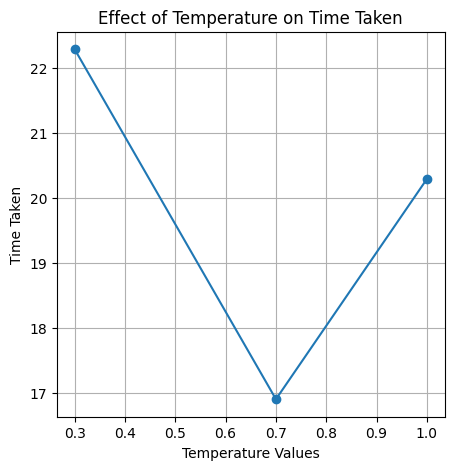

In [10]:
import matplotlib.pyplot as plt
temp_values=[0.3,0.7,1.0]
plt.figure(figsize=(5, 5))  # Use figsize instead of separate parameters
plt.plot(temp_values, time_values, marker='o', linestyle='-')  # Added markers for clarity
plt.xlabel("Temperature Values")
plt.ylabel("Time Taken")
plt.title("Effect of Temperature on Time Taken")
plt.grid(True)
plt.show()